In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# move into project directory
repo_name = "flower-fgvc"
%cd /content/drive/MyDrive/Personal-Projects/$repo_name
!ls

/content/drive/MyDrive/Personal-Projects/flower-fgvc
common	     data		datautils    Index.ipynb  models     run.yaml
config.yaml  data_processor.py	experiments  index.py	  README.md


In [3]:
# set up environment
# comment out if not required
'''
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install matplotlib numpy pandas pyyaml opencv-python
'''

#!pip install transformers


'\n!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118\n!pip install matplotlib numpy pandas pyyaml opencv-python\n'

In [4]:
# this cell is for downloading data.
# as of yet data is not hosted and is available in the private data folder

#!tar xf data/102flowers.tgz -C data/

In [5]:
#set up some imports

import numpy as np
import torch
import random
from torchvision import transforms

# custom imports

from common.utils import init_config, get_exp_params, get_modelinfo
from datautils.dataset import FlowerDataset
from datautils.datareader import get_file_paths
from experiments.classification import Classification
from common.visualization import Visualization
from experiments.classifier_tester import ModelTester
from models.custom_models import get_model

In [6]:
seed = 123
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [7]:
config_params = init_config()
print('nb', config_params)

nb {'data_dir': '/content/drive/MyDrive/Personal-Projects/flower-fgvc/data', 'device': 'cuda', 'output_dir': '/content/drive/MyDrive/Personal-Projects/flower-fgvc/output', 'root_dir': '/content/drive/MyDrive/Personal-Projects/flower-fgvc', 'use_gpu': True}


In [8]:
# read experiment params

exp_params = get_exp_params()
print('Experiment parameters\n')
print(exp_params)

Experiment parameters

{'transform': {'resize_dim': 399, 'crop_dim': 300}, 'train': {'batch_size': 64, 'loss': 'ecc', 'epoch_interval': 2, 'num_epochs': 20, 'lamda1': 0.1, 'lamda2': 0.08, 'enable_lr_decay': False, 'lr_step': 10, 'lr_decay': 0.1, 'ecc_alpha': 0.5, 'shared_space_numfeats': 4096}, 'model': {'name': 'alexnet', 'optimizer': 'Adam', 'lr': 1e-05, 'weight_decay': 1e-07, 'amsgrad': True, 'momentum': 0.8, 'build_on_pretrained': False, 'pretrained_filename': '/models/checkpoints/last_model.pt'}, 'dataset': {'size': 'full'}}


In [9]:
composed_transforms =  transforms.Compose([
            #transforms.ToTensor(),
            #transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                        #std=[0.229, 0.224, 0.225]),
            transforms.Resize(exp_params['transform']['resize_dim']),
            transforms.CenterCrop(exp_params['transform']['crop_dim'])
        ])

train_fns, val_fns, test_fns, _ = get_file_paths(config_params['data_dir'])
ftr_dataset = FlowerDataset(config_params['data_dir'], train_fns, composed_transforms)
val_dataset = FlowerDataset(config_params['data_dir'], val_fns, composed_transforms)
test_dataset = FlowerDataset(config_params['data_dir'], test_fns, composed_transforms)
sm_trlen = int(0.3 * len(ftr_dataset))
sm_telen = int(0.03 * len(test_dataset))
sm_vlen = int(0.3 * len(val_dataset))

sm_ftr_dataset = torch.utils.data.Subset(ftr_dataset, list(range(sm_trlen)))
sm_val_dataset = torch.utils.data.Subset(val_dataset, list(range(sm_vlen)))
sm_test_dataset = torch.utils.data.Subset(test_dataset, list(range(sm_telen)))

print('Full train dataset length', len(ftr_dataset))
print('Subset train dataset length', sm_trlen)
print('\nFull validation dataset length', len(val_dataset))
print('Subset validation dataset length', sm_vlen)
print('\nFull test dataset length', len(test_dataset))
print('Subset test dataset length', sm_telen)

Full train dataset length 1020
Subset train dataset length 306

Full validation dataset length 1020
Subset validation dataset length 306

Full test dataset length 6149
Subset test dataset length 184


In [10]:
# cell that trains the model
composed_transforms =  transforms.Compose([
            #transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                        std=[0.229, 0.224, 0.225]),
            transforms.Resize(exp_params['transform']['resize_dim']),
            transforms.CenterCrop(exp_params['transform']['crop_dim'])
        ])
if exp_params['dataset']['size'] == 'subset':
    classification = Classification(sm_ftr_dataset, sm_val_dataset)
    classification.run_fgvc_pipeline()
else:
    classification = Classification(ftr_dataset, val_dataset)
    classification.run_fgvc_pipeline()


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 115MB/s]


Training of classifier...



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


text features size torch.Size([102, 512]) 

	Epoch 0 Training Loss: 22.843726902382045
	Epoch 0 Validation Loss: 13.171859741210938

	Epoch 2 Training Loss: 8.594349849925322
	Epoch 2 Validation Loss: 7.083255872539445

	Epoch 4 Training Loss: 6.1612433639227175
	Epoch 4 Validation Loss: 6.037084422392003

	Epoch 6 Training Loss: 5.704609410903033
	Epoch 6 Validation Loss: 5.906649959788603

	Epoch 8 Training Loss: 5.453170477175245
	Epoch 8 Validation Loss: 6.016012902353324

	Epoch 10 Training Loss: 5.429941902908625
	Epoch 10 Validation Loss: 6.206731220320159

	Epoch 12 Training Loss: 5.385844092275582
	Epoch 12 Validation Loss: 6.4168790630265775

	Epoch 14 Training Loss: 5.3602138444489125
	Epoch 14 Validation Loss: 6.6368904562557445

	Epoch 16 Training Loss: 5.373311510273054
	Epoch 16 Validation Loss: 6.855367922315411

	Epoch 18 Training Loss: 5.336473951152727
	Epoch 18 Validation Loss: 7.081995317047718




Model results




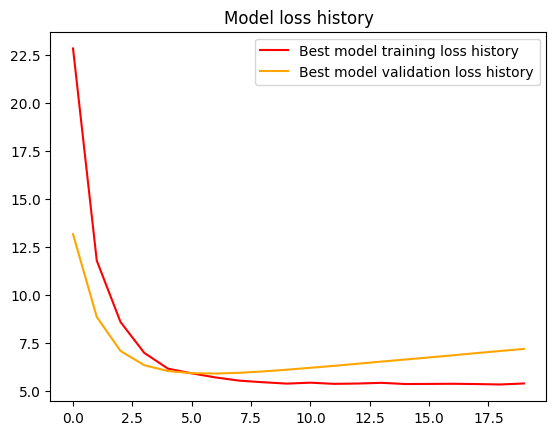

In [11]:
model_info = get_modelinfo('')
vis = Visualization(model_info)
vis.get_results()

In [12]:
# cell that tests the model
model = get_model(102, exp_params["model"]["name"])
model.load_state_dict(torch.load("models/checkpoints/last_model.pt", map_location = torch.device(config_params["device"])))

if exp_params['dataset']['size'] == 'subset':
    mt = ModelTester(model, sm_test_dataset, composed_transforms)
    mt.test_and_plot()
else:
    mt = ModelTester(model, sm_test_dataset, composed_transforms)
    mt.test_and_plot()

<ipython-input-12-d1cd05556ef8>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("models/checkpoints/last_model.pt", map_location = torch.de


Test Loss: 2.430564714514691
Test Accuracy: tensor(0.1685, device='cuda:0') 

